In [1]:
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from dataloader import *

In [3]:
TEST_DATA_DIR = "data/test_data/"
TEST_GT_DIR = TEST_DATA_DIR + "test_gt"
TEST_IMG_DIR = TEST_DATA_DIR + "Images"
NUM_FILES = 100

In [4]:
gt_filenames = get_file_names(TEST_GT_DIR, num_files=NUM_FILES)
img_filenames = get_file_names(TEST_IMG_DIR, num_files=NUM_FILES)

In [5]:
GTs = get_GTs(TEST_GT_DIR, gt_filenames)
images = get_images(TEST_IMG_DIR, img_filenames)

extracting data/test_data/test_gt/tr_img_01001.txt
extracting data/test_data/test_gt/tr_img_01002.txt
extracting data/test_data/test_gt/tr_img_01003.txt
extracting data/test_data/test_gt/tr_img_01004.txt
extracting data/test_data/test_gt/tr_img_01005.txt
extracting data/test_data/test_gt/tr_img_01006.txt
extracting data/test_data/test_gt/tr_img_01007.txt
extracting data/test_data/test_gt/tr_img_01008.txt
extracting data/test_data/test_gt/tr_img_01009.txt
extracting data/test_data/test_gt/tr_img_01010.txt
extracting data/test_data/test_gt/tr_img_01011.txt
extracting data/test_data/test_gt/tr_img_01012.txt
extracting data/test_data/test_gt/tr_img_01013.txt
extracting data/test_data/test_gt/tr_img_01014.txt
extracting data/test_data/test_gt/tr_img_01015.txt
extracting data/test_data/test_gt/tr_img_01016.txt
extracting data/test_data/test_gt/tr_img_01017.txt
extracting data/test_data/test_gt/tr_img_01018.txt
extracting data/test_data/test_gt/tr_img_01019.txt
extracting data/test_data/test_

In [6]:
from preprocessing import clean_GTs

GTs = clean_GTs(GTs)

In [7]:
from paddleocr import PaddleOCR, draw_ocr

In [8]:
# ocr = PaddleOCR(use_angle_cls=True, lang='en')

## Save Model

In [9]:
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar' -P 'pretrained_models/det/en'
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_distill_train.tar' -P 'pretrained_models/det/en'


In [10]:
# # v4 infer + train
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar' -P 'pretrained_models/rec/en/v4'
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar' -P 'pretrained_models/rec/en/v4'

# #v3 infer + train (quantizeSlim quantization)
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_slim_infer.tar' -P 'pretrained_models/rec/en/v3'
# !wget 'https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_slim_train.tar' -P 'pretrained_models/rec/en/v3'

# # angle classification models
# !wget 'https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar' -P 'pretrained_models/cls/en'
# !wget 'https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_train.tar' -P 'pretrained_models/cls/en'


## Load Model

In [8]:
det_infer_dir = 'pretrained_models/det/en/en_PP-OCRv3_det_infer'
recv3_infer_dir = "pretrained_models/rec/en/v3/en_PP-OCRv3_rec_slim_infer"
recv4_infer_dir = "pretrained_models/rec/en/v4/en_PP-OCRv4_rec_infer"
cls_infer_dir = 'pretrained_models/cls/en/ch_ppocr_mobile_v2.0_cls_infer'

In [9]:
ocr_v4 = PaddleOCR(det_model_dir=det_infer_dir,
                   rec_model_dir=recv3_infer_dir,
                   cls_model_dir=cls_infer_dir, 
                   use_angle_cls=True,
                   lang='en')

preds = ocr_v4.ocr(images[4], cls=True)

[2024/06/10 11:46:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='pretrained_models/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='pretrained_models/rec/en/v3/en_PP-OCRv3_rec_slim_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path

## Fine tuning

## Inference

In [22]:
paddleocr_results = []
for img in images:
    paddle_pred = ocr_v4.ocr(img, cls=True)
    paddleocr_results.append(paddle_pred)

[2024/06/05 14:38:46] ppocr DEBUG: dt_boxes num : 1, elapsed : 1.8997776508331299
[2024/06/05 14:38:46] ppocr DEBUG: cls num  : 1, elapsed : 0.04073596000671387
[2024/06/05 14:38:46] ppocr DEBUG: rec_res num  : 1, elapsed : 0.24366140365600586
[2024/06/05 14:38:48] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.7030057907104492
[2024/06/05 14:38:48] ppocr DEBUG: cls num  : 2, elapsed : 0.07633256912231445
[2024/06/05 14:38:49] ppocr DEBUG: rec_res num  : 2, elapsed : 0.6743369102478027
[2024/06/05 14:38:50] ppocr DEBUG: dt_boxes num : 3, elapsed : 1.466263771057129
[2024/06/05 14:38:50] ppocr DEBUG: cls num  : 3, elapsed : 0.06984186172485352
[2024/06/05 14:38:51] ppocr DEBUG: rec_res num  : 3, elapsed : 0.586801290512085
[2024/06/05 14:38:52] ppocr DEBUG: dt_boxes num : 2, elapsed : 1.5965938568115234
[2024/06/05 14:38:52] ppocr DEBUG: cls num  : 2, elapsed : 0.0527193546295166
[2024/06/05 14:38:53] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3752009868621826
[2024/06/05 14:38:53] ppocr DE

In [34]:
paddleocr_results

[[[[[[582.0, 1205.0], [2820.0, 1240.0], [2814.0, 1647.0], [576.0, 1612.0]],
    ('TICKETS', 0.993188202381134)]]],
 [[[[[945.0, 4.0], [1267.0, 4.0], [1267.0, 41.0], [945.0, 41.0]],
    ('#5TimesLonger', 0.9933262467384338)],
   [[[608.0, 809.0], [1614.0, 841.0], [1611.0, 928.0], [605.0, 896.0]],
    ('#5TimesLonger', 0.987477719783783)]]],
 [[[[[490.0, 281.0], [639.0, 342.0], [624.0, 378.0], [476.0, 318.0]],
    ('DISTRICT', 0.9962494373321533)],
   [[[408.0, 300.0], [702.0, 424.0], [674.0, 491.0], [380.0, 367.0]],
    ('Texas', 0.9970062971115112)],
   [[[680.0, 359.0], [765.0, 389.0], [754.0, 422.0], [668.0, 393.0]],
    ('600', 0.9969674944877625)]]],
 [[[[[982.0, 563.0], [1411.0, 570.0], [1409.0, 646.0], [981.0, 639.0]],
    ('Blackthorn', 0.9951540231704712)],
   [[[1269.0, 674.0], [1444.0, 674.0], [1444.0, 727.0], [1269.0, 727.0]],
    ('Available', 0.997241735458374)]]],
 [[[[[116.0, 100.0], [423.0, 108.0], [420.0, 186.0], [114.0, 178.0]],
    ('YAHOO!', 0.9798364043235779)],
  

In [23]:
paddle_preds= []
for results in paddleocr_results:
    # print("*************",results)
    paddle_texts=[]
    for pred in results[0]:
        # print("#######",pred)
        paddle_texts.append((pred[0], pred[1][0]))
    paddle_preds.append(paddle_texts)

## Visualization

data/test_data/Images/tr_img_01002.jpg
[[[[945.0, 4.0], [1267.0, 4.0], [1267.0, 41.0], [945.0, 41.0]], ('#5TimesLonger', 0.9933262467384338)], [[[608.0, 809.0], [1614.0, 841.0], [1611.0, 928.0], [605.0, 896.0]], ('#5TimesLonger', 0.987477719783783)]]


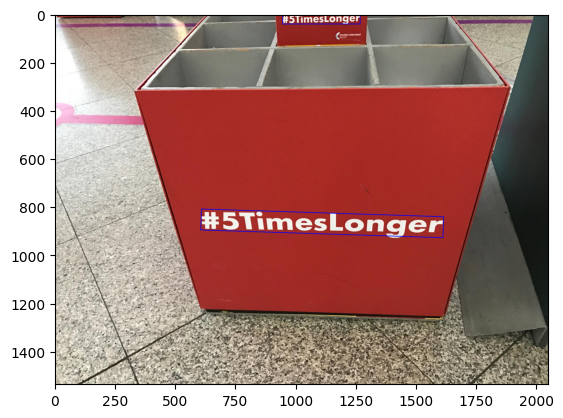

In [32]:
id = 1

file_path = TEST_IMG_DIR +'/'+ img_filenames[id]
print(file_path)

def read_image(file_path):
    image = np.asarray(Image.open(file_path).convert('RGB'))
    return image

img = read_image(file_path)
img_cv2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

for line in paddleocr_results[1]:
    print(line)

# Draw the results on the image
boxes = [elements[0] for elements in line]
image = draw_ocr(img_cv2, boxes)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
paddle_preds[1]

[([[945.0, 4.0], [1267.0, 4.0], [1267.0, 41.0], [945.0, 41.0]],
  '#5TimesLonger'),
 ([[608.0, 809.0], [1614.0, 841.0], [1611.0, 928.0], [605.0, 896.0]],
  '#5TimesLonger')]

In [15]:
from evaluation import avg_metrics

In [26]:
p_cer, p_wer, p_ioup, p_iour, p_iouf1, p_tp, p_tr, p_tf1 = avg_metrics(GTs, paddle_preds)
p_cer, p_wer, p_ioup, p_iour, p_iouf1, p_tp, p_tr, p_tf1

(0.16666666666666669,
 0.2,
 0.8333333333333333,
 0.5663636363636364,
 0.6380952380952383,
 0.9,
 0.5845454545454546,
 0.6666666666666667)

## Tracking with MLflow

In [10]:
import mlflow

In [11]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("temp experiemnts")

<Experiment: artifact_location='/home/fatcat/Project/Experiments/mlruns/3', creation_time=1717504383188, experiment_id='3', last_update_time=1717504383188, lifecycle_stage='active', name='temp experiemnts', tags={}>

In [34]:
from mlflow.pyfunc import PythonModel, PythonModelContext

class MyPaddleOCR(PythonModel):
    def load_context(self, context: PythonModelContext):
        from paddleocr import PaddleOCR

        self._det_infer_dir = context.artifacts["det_dir"]
        self._rec_infer_dir = context.artifacts["rec_dir"]
        self._cls_infer_dir = context.artifacts["cls_dir"]
        
        self._model = PaddleOCR(det_model_dir=self._det_infer_dir,
                   rec_model_dir=self._rec_infer_dir,
                   cls_model_dir=self._cls_infer_dir, 
                   use_angle_cls=True,
                   lang='en')


    def predict(self, context: PythonModelContext, image):
        self._image=image
        self.preds = self._model.ocr(image)
        paddle_bb_texts=[]
        for pred in self.preds[0]:
            paddle_bb_texts.append((pred[0], pred[1][0]))

        return paddle_bb_texts
    
    def visualize(self):
        from paddleocr import draw_ocr
        
        img_cv2 = cv2.cvtColor(np.array(self._image), cv2.COLOR_RGB2BGR)
        for line in self.preds:
            print(line)

        # Draw the results on the image
        boxes = [elements[0] for elements in line]
        image = draw_ocr(img_cv2, boxes)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        
    

In [35]:
with mlflow.start_run() as run:
    
    ocr_v3 = PaddleOCR(det_model_dir=det_infer_dir,
                   rec_model_dir=recv3_infer_dir,
                   cls_model_dir=cls_infer_dir, 
                   use_angle_cls=True,
                   lang='en')

    paddleocr_results = []
    for img in images:
        paddle_pred = ocr_v3.ocr(img, cls=True)
        paddleocr_results.append(paddle_pred)
    
    paddle_preds= []
    for results in paddleocr_results:
        # print("*************",results)
        paddle_texts=[]
        if results[0] is not None:
            for pred in results[0]:
                # print("#######",pred)
                paddle_texts.append((pred[0], pred[1][0]))
            paddle_preds.append(paddle_texts)
        else :
            paddle_preds.append([])
        
    p_cer, p_wer, p_ioup, p_iour, p_iouf1, p_tp, p_tr, p_tf1 = avg_metrics(GTs, paddle_preds)

    mlflow.log_param("num_files", NUM_FILES)  
    mlflow.log_param("det_model_dir", det_infer_dir)
    mlflow.log_param("rec_model_dir", recv3_infer_dir)
    mlflow.log_param("cls_model_dir", cls_infer_dir)
    mlflow.log_param("use_angle_cls", True)
    mlflow.log_param("lang", "en")
    
    mlflow.log_metric("CER", p_cer)
    mlflow.log_metric("WER", p_wer)
    mlflow.log_metric("IOU Precision", p_ioup)
    mlflow.log_metric("IOU Recall", p_iour)
    mlflow.log_metric("IOU F1", p_iouf1)
    mlflow.log_metric("Text precision", p_tp)
    mlflow.log_metric("Text recall", p_tr)
    mlflow.log_metric("Text F1", p_tf1)
    mlflow.pyfunc.log_model("paddleocr", 
                        python_model=MyPaddleOCR(),
                        artifacts={ 
                            'det_dir': det_infer_dir,
                            'rec_dir': recv3_infer_dir,
                            'cls_dir': cls_infer_dir  
                        })
    
    

[2024/06/10 13:38:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='pretrained_models/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='pretrained_models/rec/en/v3/en_PP-OCRv3_rec_slim_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path

In [36]:
with mlflow.start_run() as run:
    
    ocr_v4 = PaddleOCR(det_model_dir=det_infer_dir,
                   rec_model_dir=recv4_infer_dir,
                   cls_model_dir=cls_infer_dir, 
                   use_angle_cls=True,
                   lang='en')

    paddleocr_results = []
    for img in images:
        paddle_pred = ocr_v4.ocr(img, cls=True)
        paddleocr_results.append(paddle_pred)
    
    paddle_preds= []
    for results in paddleocr_results:
        # print("*************",results)
        paddle_texts=[]
        if results[0] is not None:
            for pred in results[0]:
                # print("#######",pred)
                paddle_texts.append((pred[0], pred[1][0]))
            paddle_preds.append(paddle_texts)
        else :
            paddle_preds.append([])
    
    p_cer, p_wer, p_ioup, p_iour, p_iouf1, p_tp, p_tr, p_tf1 = avg_metrics(GTs, paddle_preds)

    mlflow.log_param("num_files", NUM_FILES)  
    mlflow.log_param("det_model_dir", det_infer_dir)
    mlflow.log_param("rec_model_dir", recv4_infer_dir)
    mlflow.log_param("cls_model_dir", cls_infer_dir)
    mlflow.log_param("use_angle_cls", True)
    mlflow.log_param("lang", "en")
    
    mlflow.log_metric("CER", p_cer)
    mlflow.log_metric("WER", p_wer)
    mlflow.log_metric("IOU Precision", p_ioup)
    mlflow.log_metric("IOU Recall", p_iour)
    mlflow.log_metric("IOU F1", p_iouf1)
    mlflow.log_metric("Text precision", p_tp)
    mlflow.log_metric("Text recall", p_tr)
    mlflow.log_metric("Text F1", p_tf1)
    mlflow.pyfunc.log_model("paddleocr", 
                        python_model=MyPaddleOCR(),
                        artifacts={ 
                            'det_dir': det_infer_dir,
                            'rec_dir': recv4_infer_dir,
                            'cls_dir': cls_infer_dir  
                        })
    
    

[2024/06/10 13:45:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='pretrained_models/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='pretrained_models/rec/en/v4/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/ho